# OLA - Ensemble Learning


# Problem Statement

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

# Column Profiling:

   * MMMM-YY : Reporting Date (Monthly)
   * Driver_ID : Unique id for drivers
   * Age : Age of the driver
   * Gender : Gender of the driver – Male : 0, Female: 1
   * City : City Code of the driver
   * Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
   * Income : Monthly average Income of the driver
   * Date Of Joining : Joining date for the driver
   * LastWorkingDate : Last date of working for the driver
   * Joining Designation : Designation of the driver at the time of joining
   * Grade : Grade of the driver at the time of reporting
   * Total Business Value : The total business value acquired by the driver in a month (negative business indicates                  cancellation/refund or car EMI adjustments)
   * Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


In [1]:
# Analysis
#Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

In [2]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
df.shape

(19104, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
#calculating Total missing values
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

# Observations:
* There are some Missing Values
* Lets impute them with KNN Imputation

In [7]:
#Dropping Unnamed column which is not Required
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
#Converting series to numpy array to impute KNN IMputation
age=df['Age']
age=age.to_numpy(dtype ='float32').reshape(-1,1)
gender=df['Gender']
gender=gender.to_numpy(dtype ='float32').reshape(-1,1)

In [9]:
#Imputing Missing values with KNN Imoutation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df['Age']=imputer.fit_transform(age)
df['Gender']=imputer.fit_transform(gender)

In [10]:
#After applying KNN imputaion it converted to numpy array so converted to Series
df['Age'] = pd.Series(df['Age'])
df['Gender'] = pd.Series(df['Gender'])

In [11]:
#converting float to INT type 
df['Age'] = df['Age'].astype('int')
df['Gender'] = df['Gender'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Driver_ID             19104 non-null  int64 
 2   Age                   19104 non-null  int32 
 3   Gender                19104 non-null  int32 
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  int64 
 6   Income                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Grade                 19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int32(2), int64(7), object(4)
memory usage: 1.7+ MB


In [13]:
#converting colums to datetime format to subtract them
df['MMM-YY']= pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']= pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']= pd.to_datetime(df['LastWorkingDate'])

In [14]:
df_new=df.groupby(['Driver_ID','Quarterly Rating']).agg({'MMM-YY':'last','Age':'last','Gender':'last','City':'last',
                                                                  'Education_Level':'last','Dateofjoining':'first',
                                                                       'LastWorkingDate':'last','Joining Designation':'first',
                                                                        'Grade':'first','Income':'last',
                                                                  'Total Business Value':'sum' })
df_new

MMM-YY  Age  Gender City  Education_Level  \
Driver_ID Quarterly Rating                                                 
1         2                2019-03-01   28       0  C23                2   
2         1                2020-12-01   31       0   C7                2   
4         1                2020-04-01   43       0  C13                2   
5         1                2019-03-01   29       0   C9                0   
6         1                2020-09-01   31       1  C11                1   
...                               ...  ...     ...  ...              ...   
2787      1                2019-06-01   28       1  C20                2   
          2                2019-03-01   28       1  C20                2   
2788      1                2020-06-01   29       0  C27                2   
          2                2020-12-01   30       0  C27                2   
          3                2020-09-01   30       0  C27                2   

                           Dateofjoining LastWorkingDate  Joining Designation  \
Driver_ID Quarterly Rating                                                      
1         2                   2018-12-24      2019-03-11                    1   
2         1                   2020-11-06             NaT                    2   
4         1                   2019-12-07      2020-04-27                    2   
5         1                   2019-01-09      2019-03-07                    1   
6         1                   2020-07-31             NaT                    3   
...                                  ...             ...                  ...   
2787      1                   2018-07-21      2019-06-20                    1   
          2                   2018-07-21             NaT                    1   
2788      1                   2020-06-08             NaT                    2   
          2                   2020-06-08             NaT                    2   
          3                   2020-06-08             NaT                    2   

                            Grade  Income  Total Business Value  
Driver_ID Quarterly Rating                                       
1         2                     1   57387               1715580  
2         1                     2   67016                     0  
4         1                     2   65603                350000  
5         1                     1   46368                120360  
6         1                     3   78728                     0  
...                           ...     ...                   ...  
2787      1                     1   69498                     0  
          2                     1   69498                977830  
2788      1                     2   70254                     0  
          2                     2   70254                611900  
          3                     2   70254               1686340  

[4023 rows x 11 columns]

In [15]:
#Not all columns are present so applying reset index 
df1=df_new.reset_index()

In [16]:
# sorted values to find diff in driver rating 
df1.sort_values(by=['Driver_ID', 'MMM-YY'], inplace=True)

In [17]:
df1['Rating_Increased']=df1.groupby(['Driver_ID'])['Quarterly Rating'].diff()
df1['Rating_Decreased']=df1.groupby(['Driver_ID'])['Quarterly Rating'].diff()

In [18]:
# Created new Columns based on driver rating
df1['Rating_Increased']=df1['Rating_Increased'].apply(lambda x: 1 if x>0 else 0 )
df1['Rating_Decreased']=df1['Rating_Decreased'].apply(lambda x: 1 if x<0 else 0 )

In [19]:
df_new=df1.groupby(['Driver_ID']).agg({'MMM-YY':'last', 'Age':'last','Gender':'last','City':'last','Education_Level':'last', 
                                       'Dateofjoining':'first','LastWorkingDate':'last','Joining Designation':'first',
                                       'Grade':'last','Income':'last','Total Business Value':'sum','Rating_Increased':'last',
                                       'Rating_Decreased':'last','Quarterly Rating':'last'})
df_new

,MMM-YY,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Income,Total Business Value,Rating_Increased,Rating_Decreased,Quarterly Rating
Driver_ID,,,,,,,,,,,,,,
1,2019-03-01,28,0,C23,2,2018-12-24,2019-03-11,1,1,57387,1715580,0,0,2
2,2020-12-01,31,0,C7,2,2020-11-06,NaT,2,2,67016,0,0,0,1
4,2020-04-01,43,0,C13,2,2019-12-07,2020-04-27,2,2,65603,350000,0,0,1
5,2019-03-01,29,0,C9,0,2019-01-09,2019-03-07,1,1,46368,120360,0,0,1
6,2020-12-01,31,1,C11,1,2020-07-31,NaT,3,3,78728,1265000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2020-12-01,34,0,C24,0,2015-10-15,NaT,2,3,82815,21748820,1,0,4
2785,2020-10-01,34,1,C9,0,2020-08-28,2020-10-28,1,1,12105,0,0,0,1
2786,2019-09-01,45,0,C19,0,2018-07-31,2019-09-22,2,2,35370,2815090,0,1,1


In [20]:
#Not all columns are present so applying reset index 
df=df_new.reset_index()
df

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Income,Total Business Value,Rating_Increased,Rating_Decreased,Quarterly Rating
0,1,2019-03-01,28,0,C23,2,2018-12-24,2019-03-11,1,1,57387,1715580,0,0,2
1,2,2020-12-01,31,0,C7,2,2020-11-06,NaT,2,2,67016,0,0,0,1
2,4,2020-04-01,43,0,C13,2,2019-12-07,2020-04-27,2,2,65603,350000,0,0,1
3,5,2019-03-01,29,0,C9,0,2019-01-09,2019-03-07,1,1,46368,120360,0,0,1
4,6,2020-12-01,31,1,C11,1,2020-07-31,NaT,3,3,78728,1265000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34,0,C24,0,2015-10-15,NaT,2,3,82815,21748820,1,0,4
2377,2785,2020-10-01,34,1,C9,0,2020-08-28,2020-10-28,1,1,12105,0,0,0,1
2378,2786,2019-09-01,45,0,C19,0,2018-07-31,2019-09-22,2,2,35370,2815090,0,1,1
2379,2787,2019-06-01,28,1,C20,2,2018-07-21,2019-06-20,1,1,69498,977830,0,1,1


In [38]:
#creation of Target Variable
df['churn']=df['LastWorkingDate']
df['churn'].fillna(0, inplace = True)
df['churn']=df['churn'].apply(lambda x: 0 if x==0 else 1)

# deriving basic insights from derived dataset

In [22]:
df['Rating_Increased'].value_counts()

0    2013
1     368
Name: Rating_Increased, dtype: int64

In [23]:
df['Rating_Decreased'].value_counts()

0    1645
1     736
Name: Rating_Decreased, dtype: int64

In [24]:
df['Gender'].value_counts()

0    1408
1     973
Name: Gender, dtype: int64

In [25]:
df['Education_Level'].value_counts()

2    802
1    795
0    784
Name: Education_Level, dtype: int64

In [39]:
df['churn'].value_counts()

1    1616
0     765
Name: churn, dtype: int64

In [27]:
# Dupluicate value check
if df.shape[0] == df.drop_duplicates().shape[0] :
    print('No duplicates Found')
else:
    duplicates = df.shape[0] - df.drop_duplicates().shape[0]
    print('{} duplicates found'.format(duplicates))

No duplicates Found


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.368459e+01,5.968409e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.086518e-01,4.916880e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.082738e+00,9.359084e-01,1.0,1.0,2.0,3.0,5.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Rating_Increased,2381.0,1.545569e-01,3.615577e-01,0.0,0.0,0.0,0.0,1.0
Rating_Decreased,2381.0,3.091138e-01,4.622253e-01,0.0,0.0,0.0,1.0,1.0


# Observations:
* Some Missing Values are present in Given Dataset, Imputed with KNN Imputation.
* No Duplicates are found in Dataset after performing Feature engineering.
* No change in monthly income so not including that  column for further analysis.
* Major Drivers are male according to Dataset.
* Total of 368 drivers rating has been increased.
* Total of 973 drivers rating has been Decreased.
* Major of Drivers are Graduated according to Dataset.
* There is a imabalance between churn and non churn data we need to use SMOTE techniques later to create Balance.

In [29]:
df_numerical=df.select_dtypes(exclude='object')
df_categorical=df.select_dtypes(include='object')

In [30]:
df_numerical.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'Education_Level',
       'Dateofjoining', 'Joining Designation', 'Grade', 'Income',
       'Total Business Value', 'Rating_Increased', 'Rating_Decreased',
       'Quarterly Rating', 'churn'],
      dtype='object')

In [31]:
df_categorical.columns

Index(['City', 'LastWorkingDate'], dtype='object')

# Univariate Analysis

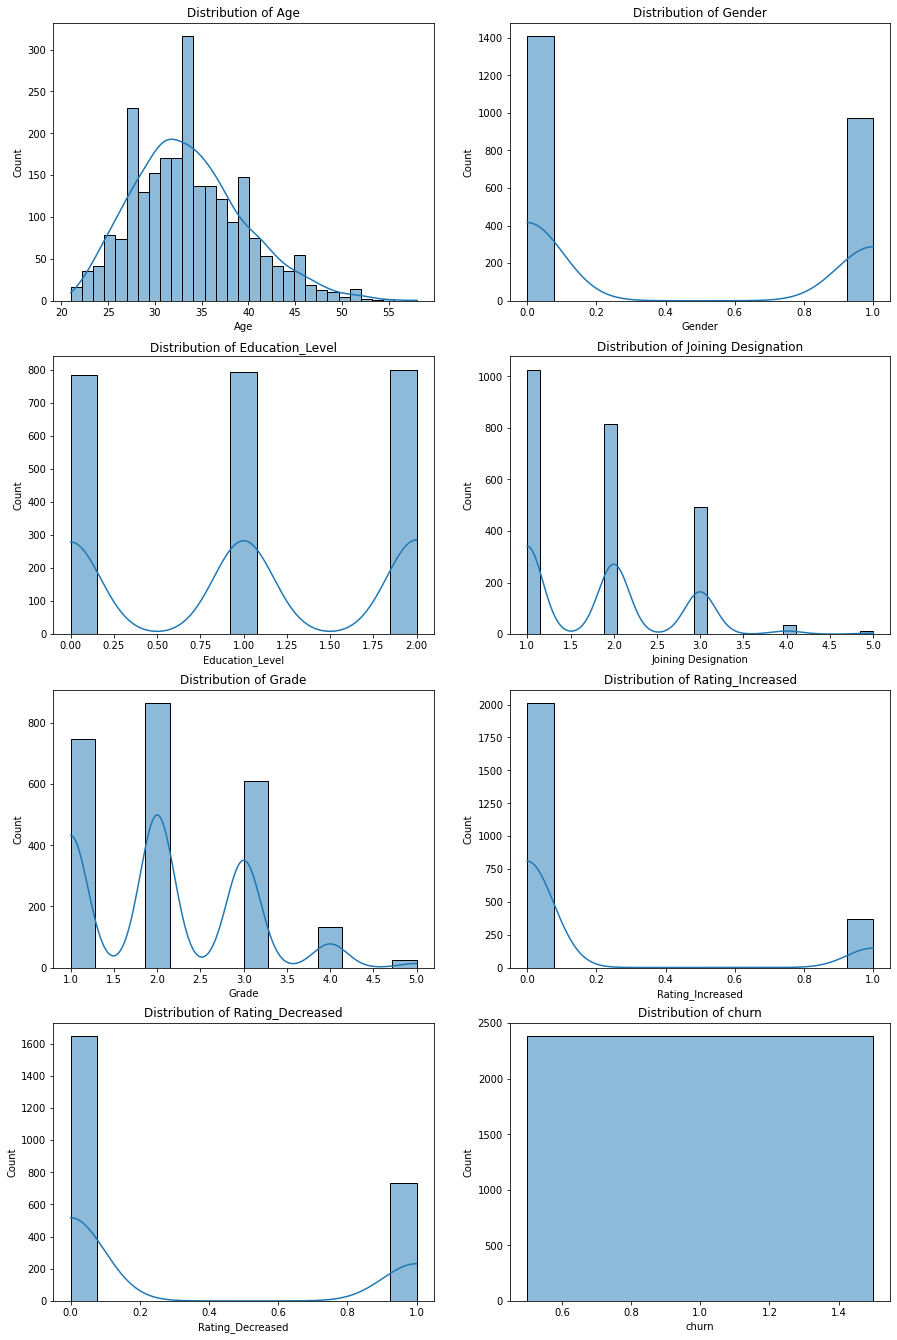

In [32]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.9)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
axis[0,0].set_title('Distribution of Age')
sns.histplot(data=df, x="Gender", kde=True, ax=axis[0,1])
axis[0,1].set_title('Distribution of Gender')
sns.histplot(data=df, x="Education_Level", kde=True, ax=axis[1,0])
axis[1,0].set_title('Distribution of Education_Level')
sns.histplot(data=df, x="Joining Designation", kde=True, ax=axis[1,1])
axis[1,1].set_title('Distribution of Joining Designation')
sns.histplot(data=df, x="Grade", kde=True, ax=axis[2,0])
axis[2,0].set_title('Distribution of Grade')
sns.histplot(data=df, x="Rating_Increased", kde=True, ax=axis[2,1])
axis[2,1].set_title('Distribution of Rating_Increased')
sns.histplot(data=df, x="Rating_Decreased", kde=True, ax=axis[3,0])
axis[3,0].set_title('Distribution of Rating_Decreased')
sns.histplot(data=df, x="churn", kde=True, ax=axis[3,1])
axis[3,1].set_title('Distribution of churn')
plt.show()

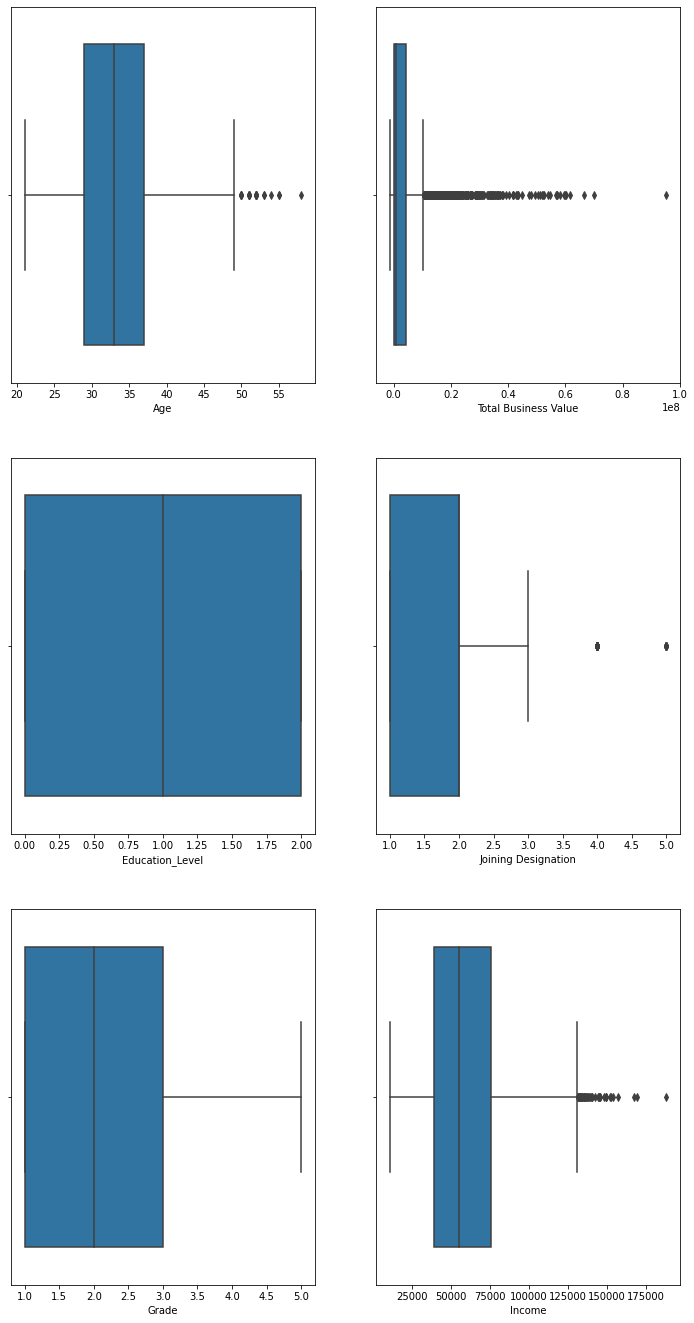

In [33]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.9)

sns.boxplot(data=df, x="Age", ax=axis[0,0])
sns.boxplot(data=df, x="Total Business Value", ax=axis[0,1])
sns.boxplot(data=df, x="Education_Level", ax=axis[1,0])
sns.boxplot(data=df, x="Joining Designation", ax=axis[1,1])
sns.boxplot(data=df, x="Grade", ax=axis[2,0])
sns.boxplot(data=df, x="Income", ax=axis[2,1])
plt.show()

<AxesSubplot:xlabel='City', ylabel='count'>

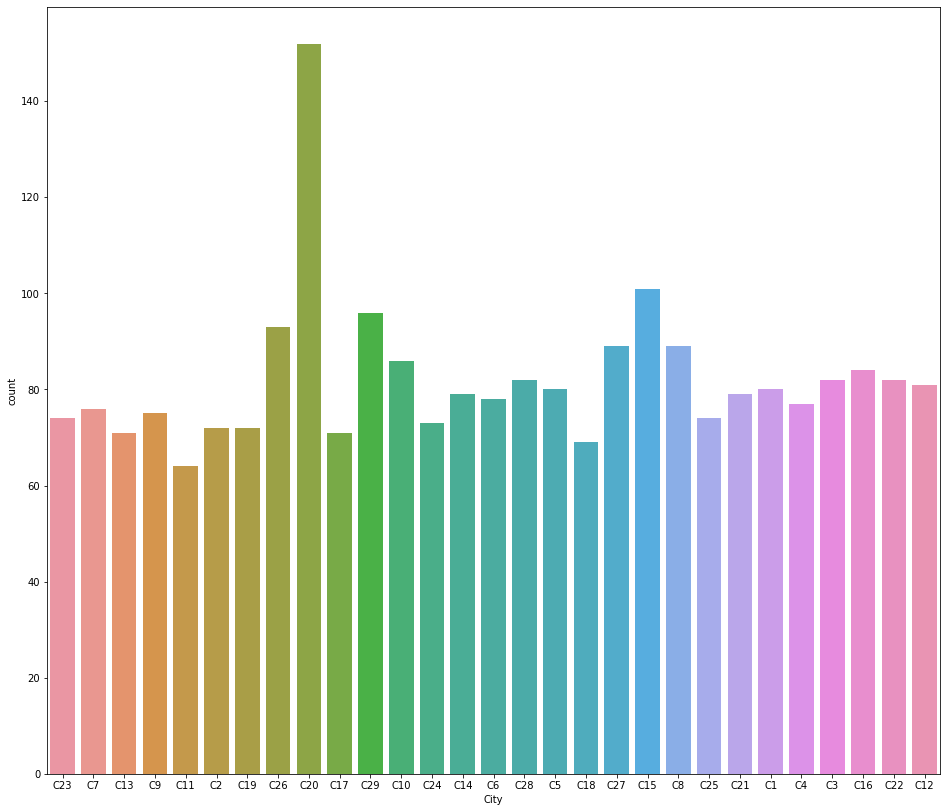

In [34]:
fig, axis = plt.subplots(nrows=1, figsize=(16, 6))
fig.subplots_adjust(top=1.9)

sns.countplot(data=df, x="City")

# Observations:

* More drivers are from city c20.
* The average age for Drivers are 30-35.
* Total of 368 drivers rating has been increased.
* Total of 973 drivers rating has been Decreased.
* More Male Drivers are present.

# Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='Rating_Decreased', ylabel='churn'>

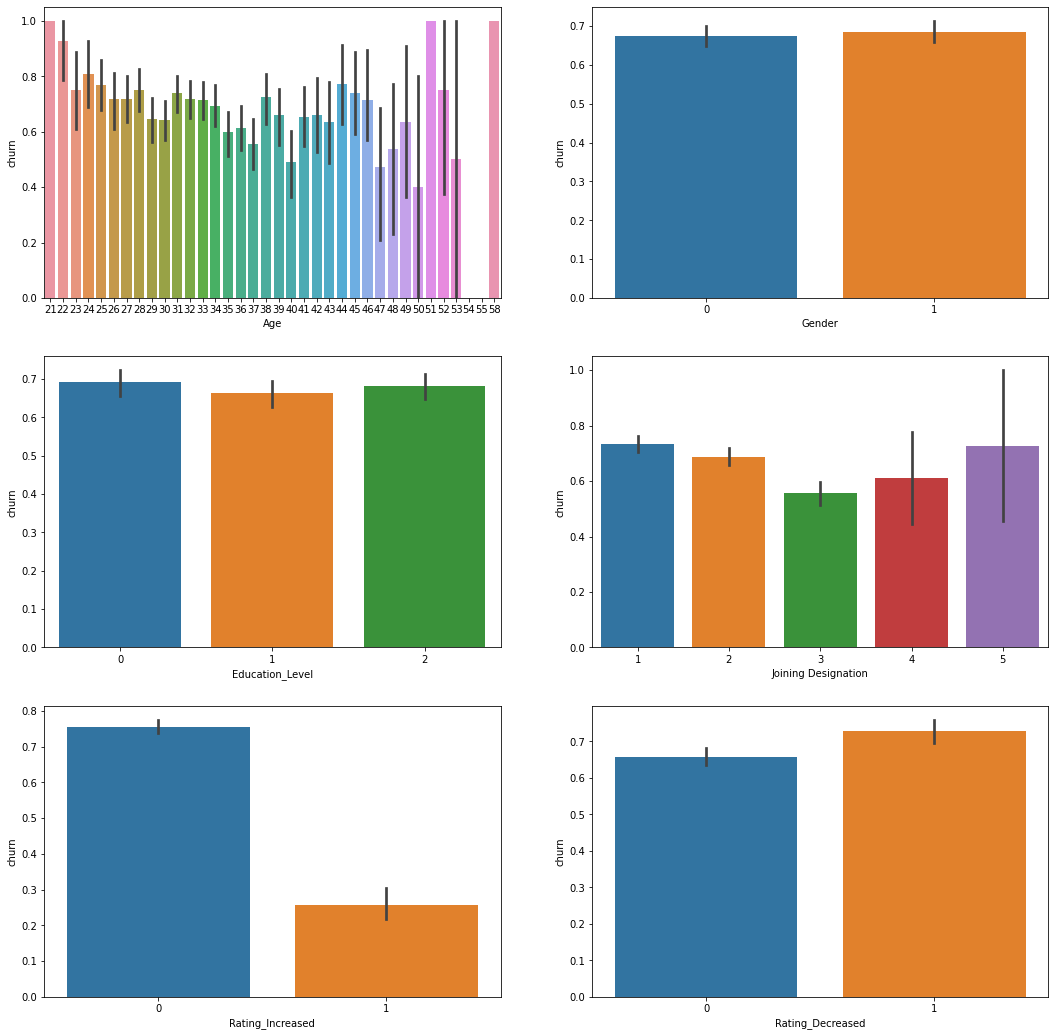

In [40]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.barplot(x='Age', y='churn', data=df, ax=axis[0,0])
sns.barplot(x='Gender', y='churn', data=df, ax=axis[0,1])
sns.barplot(x='Education_Level', y='churn', data=df, ax=axis[1,0])
sns.barplot(x='Joining Designation', y='churn', data=df, ax=axis[1,1])
sns.barplot(x='Rating_Increased', y='churn', data=df, ax=axis[2,0])
sns.barplot(x='Rating_Decreased', y='churn', data=df, ax=axis[2,1])

<AxesSubplot:xlabel='Rating_Decreased', ylabel='churn'>

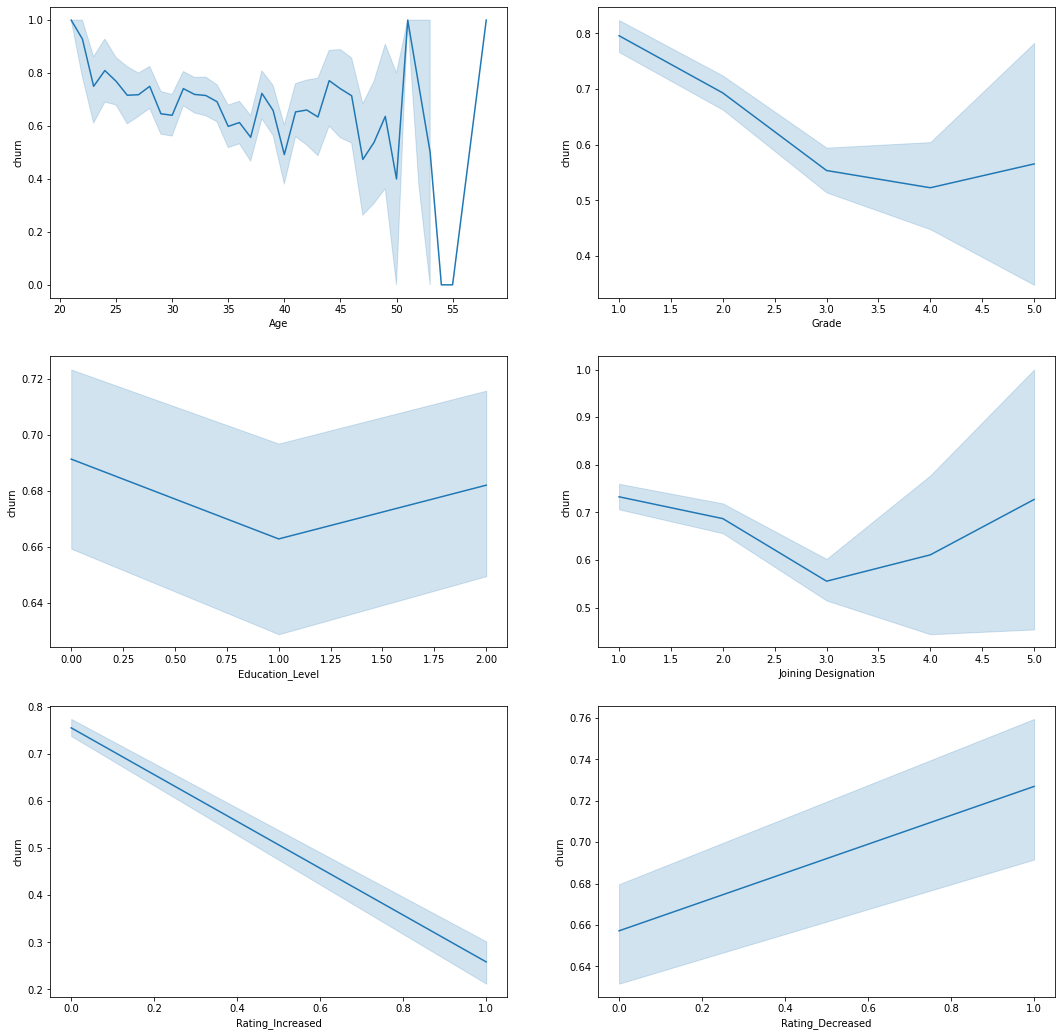

In [41]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.lineplot(x='Age', y='churn', data=df, ax=axis[0,0])
sns.lineplot(x='Grade',y='churn', data=df, ax=axis[0,1])
sns.lineplot(x='Education_Level',y='churn', data=df, ax=axis[1,0])
sns.lineplot(x='Joining Designation',y='churn', data=df, ax=axis[1,1])
sns.lineplot(x='Rating_Increased',y='churn', data=df, ax=axis[2,0])
sns.lineplot(x='Rating_Decreased',y='churn', data=df, ax=axis[2,1])

<AxesSubplot:xlabel='Rating_Decreased', ylabel='churn'>

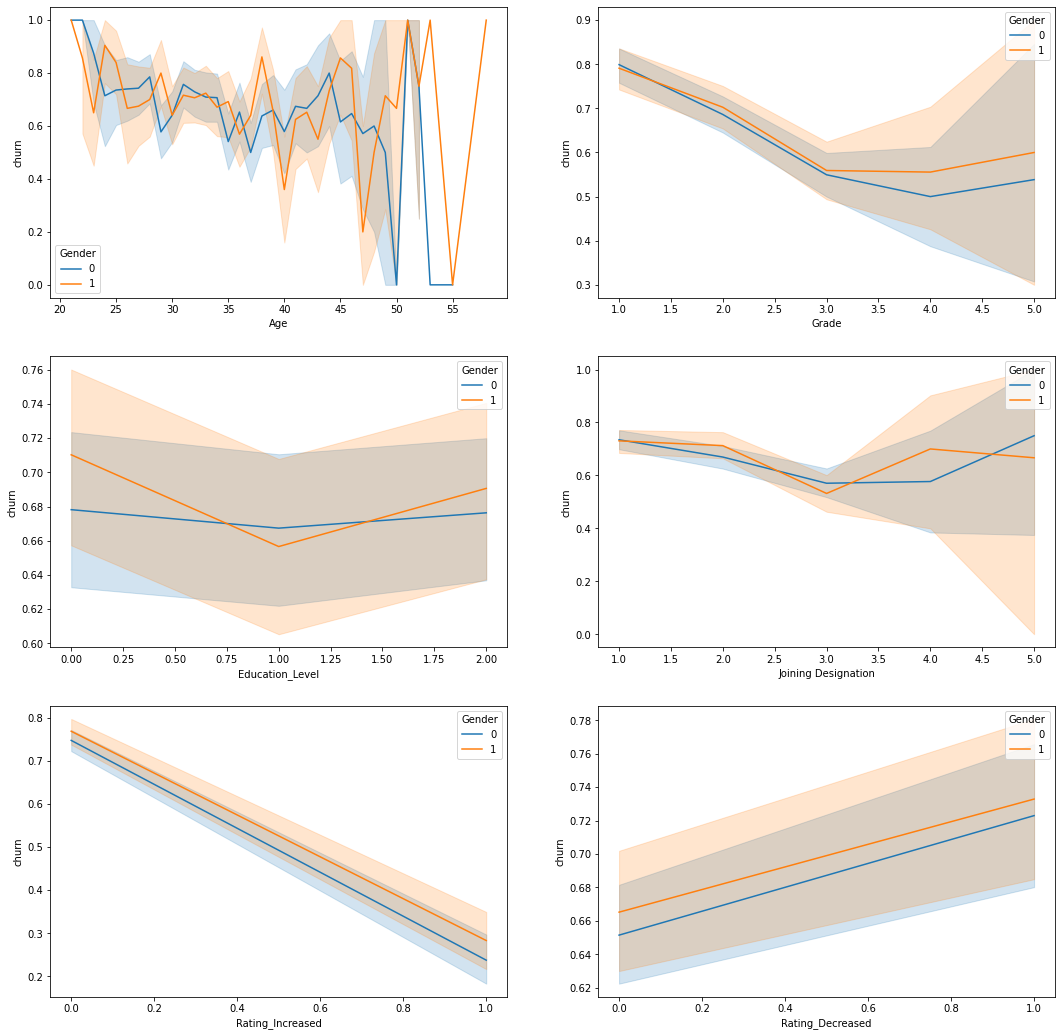

In [42]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(18, 10))
fig.subplots_adjust(top=1.5)

sns.lineplot(x='Age',hue='Gender', y='churn', data=df, ax=axis[0,0])
sns.lineplot(x='Grade',hue='Gender', y='churn', data=df, ax=axis[0,1])
sns.lineplot(x='Education_Level',hue='Gender', y='churn', data=df, ax=axis[1,0])
sns.lineplot(x='Joining Designation',hue='Gender', y='churn', data=df, ax=axis[1,1])
sns.lineplot(x='Rating_Increased',hue='Gender', y='churn', data=df, ax=axis[2,0])
sns.lineplot(x='Rating_Decreased',hue='Gender', y='churn', data=df, ax=axis[2,1])

<AxesSubplot:xlabel='City', ylabel='churn'>

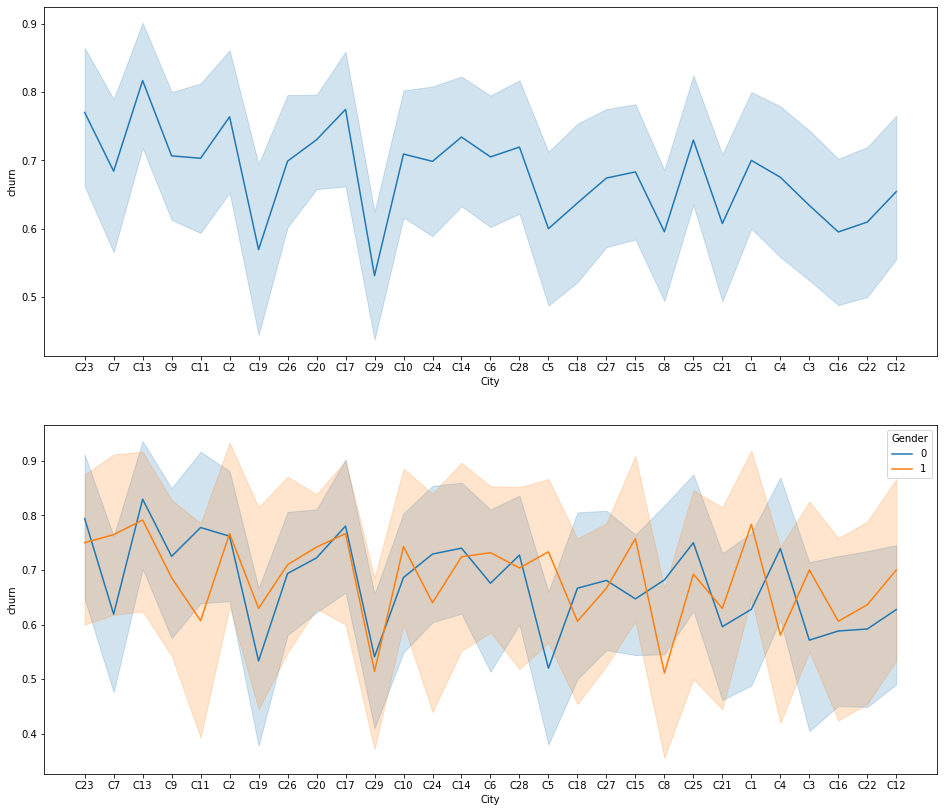

In [43]:
fig, axis = plt.subplots(nrows=2, figsize=(16, 6))
fig.subplots_adjust(top=1.9)

sns.lineplot(x='City',y='churn',data=df,ax=axis[0])
sns.lineplot(x='City',hue='Gender',y='churn',data=df,ax=axis[1])

In [44]:
## correlation matrix for heat map
df.corr()

,Driver_ID,Age,Gender,Education_Level,Joining Designation,Grade,Income,Total Business Value,Rating_Increased,Rating_Decreased,Quarterly Rating,churn
Driver_ID,1.000000,-0.004829,0.015625,-0.014343,-0.023126,-0.014533,-0.017876,0.015133,0.009708,0.002058,0.012889,0.029269
Age,-0.004829,1.000000,0.035064,-0.007876,0.079399,0.238908,0.209025,0.262775,0.086854,0.141208,0.150336,-0.078571
Gender,0.015625,0.035064,1.000000,-0.008747,-0.046815,-0.007765,0.009222,0.018537,0.036909,-0.016209,0.021720,0.012109
Education_Level,-0.014343,-0.007876,-0.008747,1.000000,0.003203,-0.016218,0.140189,0.001392,0.001734,0.061733,0.006544,-0.007953
Joining Designation,-0.023126,0.079399,-0.046815,0.003203,1.000000,0.726906,0.480523,-0.121368,0.015400,-0.172525,-0.063404,-0.127773
Grade,-0.014533,0.238908,-0.007765,-0.016218,0.726906,1.000000,0.737210,0.340166,0.087604,0.031182,0.085754,-0.205410
Income,-0.017876,0.209025,0.009222,0.140189,0.480523,0.737210,1.000000,0.379468,0.110336,0.098829,0.163429,-0.201935
Total Business Value,0.015133,0.262775,0.018537,0.001392,-0.121368,0.340166,0.379468,1.000000,0.288496,0.297966,0.544176,-0.379552
Rating_Increased,0.009708,0.086854,0.036909,0.001734,0.015400,0.087604,0.110336,0.288496,1.000000,-0.285995,0.752658,-0.385063
Rating_Decreased,0.002058,0.141208,-0.016209,0.061733,-0.172525,0.031182,0.098829,0.297966,-0.285995,1.000000,-0.084170,0.069036


<AxesSubplot:>

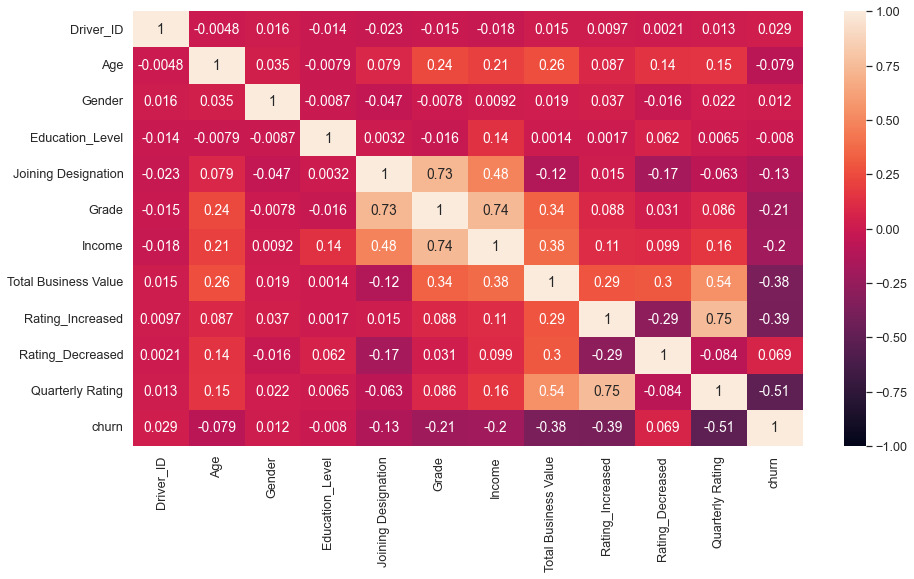

In [45]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [46]:
## spearman correlation matrix for heat map, used for better understanding 
df.corr('spearman')

,Driver_ID,Age,Gender,Education_Level,Joining Designation,Grade,Income,Total Business Value,Rating_Increased,Rating_Decreased,Quarterly Rating,churn
Driver_ID,1.000000,-0.007009,0.015667,-0.014416,-0.023266,-0.021009,-0.017635,0.012676,0.009885,0.002057,0.005634,0.029218
Age,-0.007009,1.000000,0.033503,-0.012812,0.104681,0.250074,0.208455,0.254588,0.085197,0.127446,0.147853,-0.083440
Gender,0.015667,0.033503,1.000000,-0.008789,-0.042323,-0.009093,0.014659,0.019311,0.036909,-0.016209,0.021989,0.012109
Education_Level,-0.014416,-0.012812,-0.008789,1.000000,0.001773,-0.015532,0.144004,0.036434,0.001693,0.061635,0.005278,-0.007874
Joining Designation,-0.023266,0.104681,-0.042323,0.001773,1.000000,0.756124,0.482364,-0.167053,0.015131,-0.184552,-0.057107,-0.129816
Grade,-0.021009,0.250074,-0.009093,-0.015532,0.756124,1.000000,0.706632,0.170581,0.094179,0.008236,0.117197,-0.211135
Income,-0.017635,0.208455,0.014659,0.144004,0.482364,0.706632,1.000000,0.247521,0.120536,0.073452,0.178688,-0.204289
Total Business Value,0.012676,0.254588,0.019311,0.036434,-0.167053,0.170581,0.247521,1.000000,0.397283,0.584279,0.615055,-0.292862
Rating_Increased,0.009885,0.085197,0.036909,0.001693,0.015131,0.094179,0.120536,0.397283,1.000000,-0.285995,0.741728,-0.385063
Rating_Decreased,0.002057,0.127446,-0.016209,0.061635,-0.184552,0.008236,0.073452,0.584279,-0.285995,1.000000,-0.030552,0.069036


<AxesSubplot:>

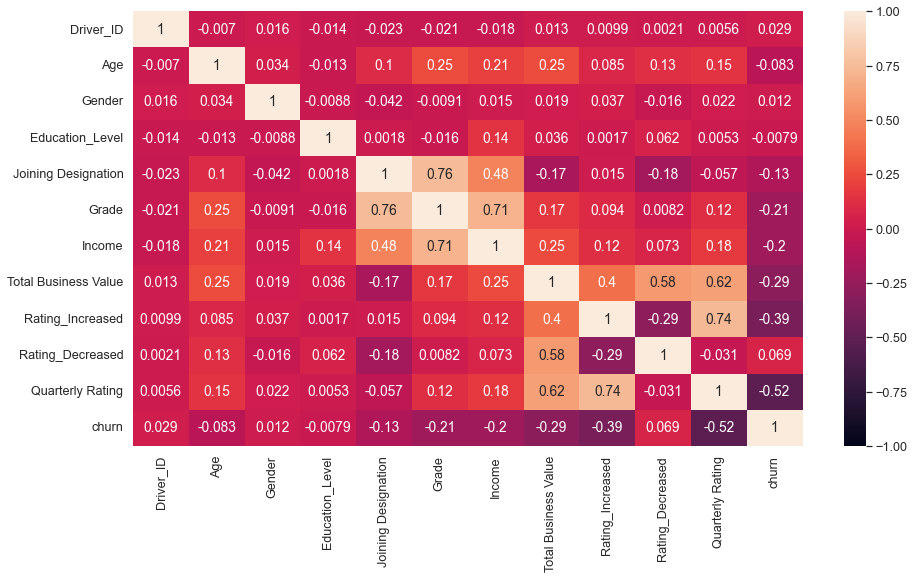

In [47]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr('spearman'),annot=True,vmin=-1, vmax=1)

# Observations:
* Rating Decreased is positively correlated with churn data irrespective of Gender.
* If age of driver is high there is high chance of that driver churns according lineplot.
* No impact of Grade and Income of driver churns.
* Gender is slighlty impacting the churn data.
* Rating Increase is negatively correlated with churn irrespective of Gender.


# Data Preparation for Modeling

In [48]:
df['City'].value_counts()

C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

In [49]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['City'])
one_hot_encoded_data

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Income,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,2019-03-01,28,0,2,2018-12-24,2019-03-11 00:00:00,1,1,57387,...,0,0,0,0,0,0,0,0,0,0
1,2,2020-12-01,31,0,2,2020-11-06,0,2,2,67016,...,0,0,0,0,0,0,0,1,0,0
2,4,2020-04-01,43,0,2,2019-12-07,2020-04-27 00:00:00,2,2,65603,...,0,0,0,0,0,0,0,0,0,0
3,5,2019-03-01,29,0,0,2019-01-09,2019-03-07 00:00:00,1,1,46368,...,0,0,0,0,0,0,0,0,0,1
4,6,2020-12-01,31,1,1,2020-07-31,0,3,3,78728,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34,0,0,2015-10-15,0,2,3,82815,...,0,0,0,0,0,0,0,0,0,0
2377,2785,2020-10-01,34,1,0,2020-08-28,2020-10-28 00:00:00,1,1,12105,...,0,0,0,0,0,0,0,0,0,1
2378,2786,2019-09-01,45,0,0,2018-07-31,2019-09-22 00:00:00,2,2,35370,...,0,0,0,0,0,0,0,0,0,0
2379,2787,2019-06-01,28,1,2,2018-07-21,2019-06-20 00:00:00,1,1,69498,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_numerical=one_hot_encoded_data.select_dtypes(exclude='object')
df_categorical=one_hot_encoded_data.select_dtypes(include='object')

In [53]:
df_numerical['MMM-YY']=(df_numerical['MMM-YY'].astype(np.int64))
df_numerical['Dateofjoining']=(df_numerical['Dateofjoining'].astype(np.int64))

In [54]:
def detect_outliers(data):
    length_before=len(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    if lower_bound<0:
        lower_bound=0
    length_after=len(data[(data>lower_bound)&(data<upper_bound)])
    data=data[(data<=upper_bound) & (data>=lower_bound)]
    print('After applying IQR Method')
    return f"{np.round((length_before-length_after)/length_before,3)}% outliers data found"


In [55]:
print("Before applying IQR Method:")
for col in df_numerical.columns:
    print(col,":", detect_outliers(df_numerical[col]))

Before applying IQR Method:
After applying IQR Method
Driver_ID : 0.0% outliers data found
After applying IQR Method
MMM-YY : 0.0% outliers data found
After applying IQR Method
Age : 0.015% outliers data found
After applying IQR Method
Gender : 0.591% outliers data found
After applying IQR Method
Education_Level : 0.329% outliers data found
After applying IQR Method
Dateofjoining : 0.06% outliers data found
After applying IQR Method
Joining Designation : 0.02% outliers data found
After applying IQR Method
Grade : 0.0% outliers data found
After applying IQR Method
Income : 0.02% outliers data found
After applying IQR Method
Total Business Value : 0.447% outliers data found
After applying IQR Method
Rating_Increased : 1.0% outliers data found
After applying IQR Method
Rating_Decreased : 0.691% outliers data found
After applying IQR Method
Quarterly Rating : 0.045% outliers data found
After applying IQR Method
churn : 0.321% outliers data found
After applying IQR Method
City_C1 : 1.0% out

# Observations:
* Very less amount of data is present and outliers are too very less,
* lets not remove outliers and use this data to train the model.

# Ensemble -Bagging Model

In [57]:
targets = df_numerical['churn']
features = df_numerical.drop(columns = {'churn'})

In [59]:
# splitting the data into train and test with some test size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,random_state=42)

In [60]:
# scaling the X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [71]:
#Building Ensemble Bagging Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=50)

#training the Model
model.fit(X_train,y_train)

#accuracy score
accuracy=model.score(X_test, y_test)

print(f'accuracy score: {accuracy}')

accuracy score: 0.9161425576519916


In [62]:
# Handling Imbalance data with SMOTE Technique
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1289, 1: 1289})


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=50)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 94.75474676491999 Validation: 93.9094501251772
K-Fold Accuracy Std: Train: 0.22269082954512817 Validation: 1.6124656378346365


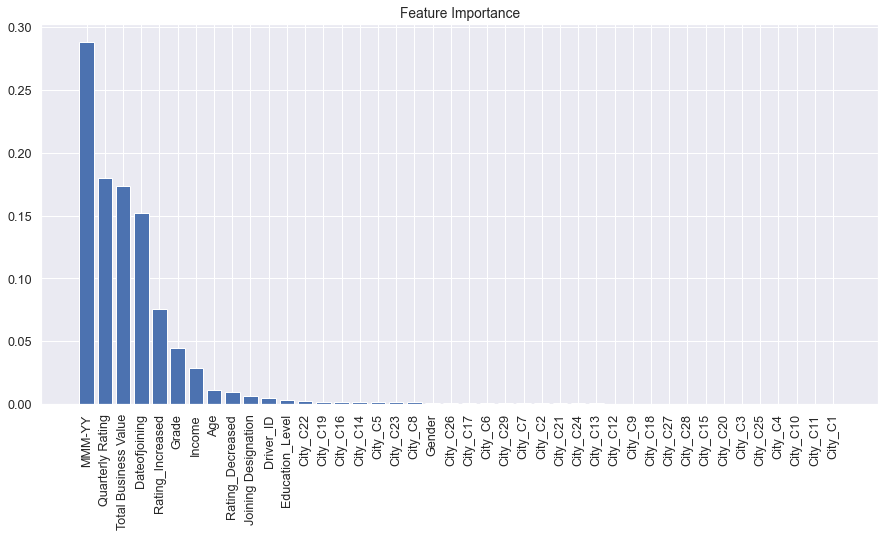

In [64]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=50)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [features.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(features.shape[1]), importances[indices]) # Add bars
plt.xticks(range(features.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Observations:

* we got Accuracy of 92% using Random Forest Algorithm.
* Let's try Hyper parameter Tuning to get best Random Forest Parameters.

# HyperParameter Tuning

In [65]:
# Defining Parametes
params = {
          'n_estimators' : [20,30,40,50],
          'max_depth' : [1,2,3],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [2,3,4,5,6,7],
         }

In [72]:
# Using GridSearchCV to get best Parameters for Model.
from sklearn.model_selection import GridSearchCV

# Tuning Function 
tuning_function = GridSearchCV(estimator = RandomForestClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

# Fitting the Tuning Function
tuning_function.fit(X_train, y_train)

# Fetching best parameters and score
parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'n_estimators': 20}
0.9574612715997252


In [80]:
#lets train the model with the best parameters.
#Building Ensemble Bagging Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=20, max_features=7, criterion='entropy',bootstrap=True)

#training the Model
model.fit(X_train, y_train)

#Predicting the model
y_pred=model.predict(X_test)

#accuracy score
accuracy=model.score(X_test, y_test)

print(f'accuracy score: {accuracy}')

accuracy score: 0.9559748427672956


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

tree_clf = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=20, max_features=7, criterion='entropy',bootstrap=True)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

K-Fold Accuracy Mean: Train: 94.98747381479447 Validation: 94.6852471872832
K-Fold Accuracy Std: Train: 0.258429506253071 Validation: 1.3008339018818098


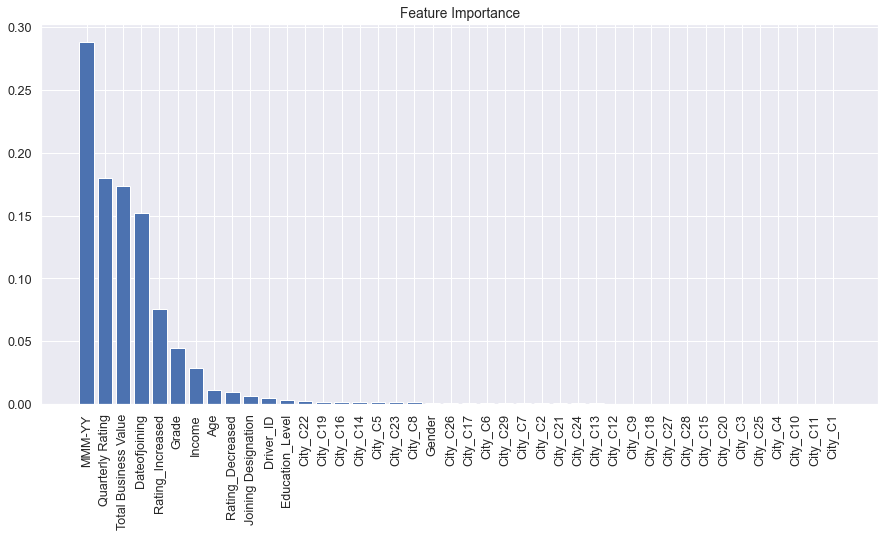

In [75]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=7, max_depth=3, n_estimators=50)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [features.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(features.shape[1]), importances[indices]) # Add bars
plt.xticks(range(features.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Observations:
* after applying Hyperparameter Tuning we got 95.5% Accuracy.

In [81]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[141,   9],
       [ 12, 315]], dtype=int64)

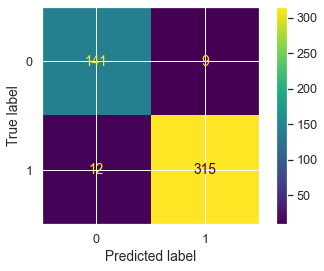

In [82]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=model.classes_)
disp.plot()
plt.show()

* TN=True Negatives
* TP=True Positives
* FN=False Negatives
* FP=False Positives

In [83]:
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('True Negatives',TN)
print('True Positives',TP)
print('False Positives',FP)
print('False Negatives',FN)

True Negatives 141
True Positives 315
False Positives 9
False Negatives 12


In [84]:
# calculating Accuracy
def Accuracy(TN,TP,FP,FN):
    ans=(TN+TP)/(TN+TP+FP+FN)
    return ans

In [85]:
Accuracy(TN,TP,FP,FN)

0.9559748427672956

In [86]:
Precision=precision_score(y_test,y_pred)
Precision

0.9722222222222222

In [87]:
Recall=recall_score(y_test,y_pred)
Recall

0.963302752293578

In [88]:
# Calculating F1 Score
def F1_score(Precision,Recall):
    ans=2*(Precision*Recall)/(Precision+Recall)
    return ans

In [89]:
F1_score=F1_score(Precision,Recall)
F1_score

0.9677419354838711

In [90]:
probs=model.predict_proba(X_test)[:,1]

roc_auc_score: 0.9613761467889909


Text(0, 0.5, 'True Positive Rate')

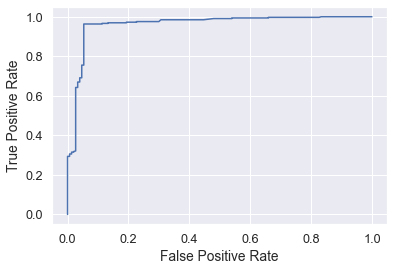

In [91]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thres=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
print('roc_auc_score:',roc_auc_score(y_test,probs))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Observations:

* Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. 
* Max score can be 1 but we got 0.96.
* Our Model is doing Great according to this Area under curve

f1 score 0.9677419354838711


Text(0, 0.5, 'Precision')

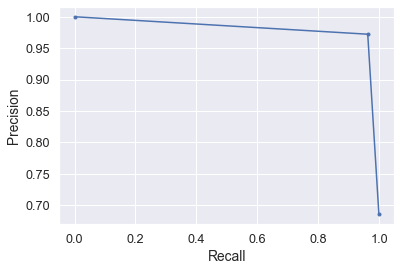

In [92]:
# Precision-Recall Curve
from sklearn.metrics import auc,precision_recall_curve,f1_score
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred)
auc(lr_recall,lr_precision)
print("f1 score",lr_f1)
plt.plot(lr_recall,lr_precision,marker='.')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Observations:

* F1 score is 0.967 which is very high
* According to this curve we get that There are high Precision and High Recall.
* This implies there are less false positives and false negatives.

# Ensemble - Boosting Method

In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import StratifiedKFold
import datetime as dt

In [97]:
#Building Ensemble  Boosting Model
from sklearn.ensemble import RandomForestClassifier

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15, silent=True)

#training the Model
xgb_model.fit(X_train,y_train)

#accuracy score
accuracy=xgb_model.score(X_test, y_test)

print(f'accuracy score: {accuracy}')

[20:00:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

accuracy score: 0.9538784067085954


In [98]:
# Handling Imbalance data with SMOTE Technique
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 1289, 1: 1289})


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15, silent=True)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(xgb_model, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

[20:04:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:04:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:04:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:04:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:04:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:04:43] WARNING: 

[20:05:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



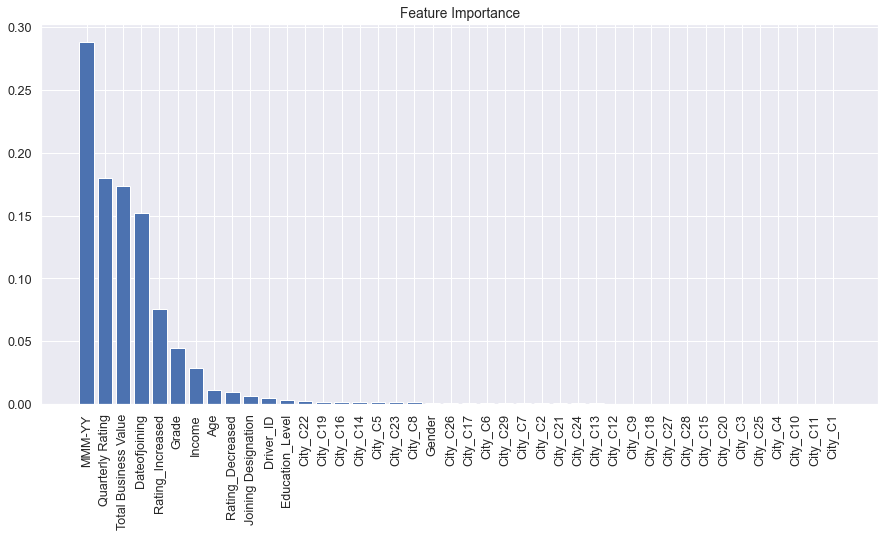

In [107]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15, silent=True)
xgb_model.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [features.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(features.shape[1]), importances[indices]) # Add bars
plt.xticks(range(features.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Observations:

* we got Accuracy of 95.3% using XGBoost Algorithm.
* Let's try Hyper parameter Tuning to get best XGBoost Parameters.

# HyperParameter Tuning

In [108]:
# Defining Parametes
params = {
          'n_estimators' : [20,30,40,50],
          'max_depth' : [1,2,3],
          'learning_rate': [0.1, 0.5, 0.8],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
         }

In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

random_search.fit(X_sm, y_sm)
print(random_search.best_params_)

In [109]:
# Using GridSearchCV to get best Parameters for Model.
from sklearn.model_selection import GridSearchCV

# Tuning Function 
tuning_function = GridSearchCV(estimator = XGBClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 3,
                               n_jobs=-1
                               )

# Fitting the Tuning Function
tuning_function.fit(X_train, y_train)

# Fetching best parameters and score
parameters = tuning_function.best_params_
score = tuning_function.best_score_
print(parameters)
print(score)  

{'colsample_bytree': 1.0, 'learning_rate': 0.8, 'max_depth': 1, 'n_estimators': 30, 'subsample': 1.0}
0.9574629275441516


In [111]:
#Building Ensemble  Boosting Model
from sklearn.ensemble import RandomForestClassifier

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15,colsample_bytree=1.0,learning_rate=0.8,
                          max_depth=1,subsample=1.0,silent=True)

#training the Model
xgb_model.fit(X_train,y_train)

#accuracy score
accuracy=xgb_model.score(X_test, y_test)

print(f'accuracy score: {accuracy}')

[20:12:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

accuracy score: 0.9559748427672956


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15,colsample_bytree=1.0,learning_rate=0.8,
                          max_depth=1,subsample=1.0,silent=True)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(xgb_model, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

[20:13:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:13:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:13:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:13:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:13:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:13:29] WARNING: 

[20:14:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



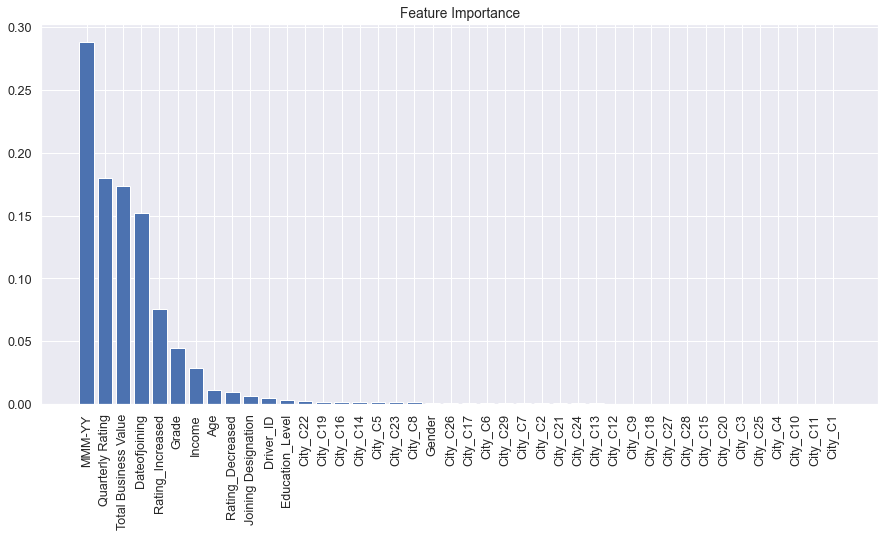

In [113]:
# Feature importance
import numpy as np 
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(n_estimators=40, objective='multi:softmax', num_class=15,colsample_bytree=1.0,learning_rate=0.8,
                          max_depth=1,subsample=1.0,silent=True)
xgb_model.fit(X_train, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [features.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(features.shape[1]), importances[indices]) # Add bars
plt.xticks(range(features.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

# Observations:
* After Applying Hyperparameter Tuning we got 95.5% Accuracy.

In [114]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cm

array([[141,   9],
       [ 13, 314]], dtype=int64)

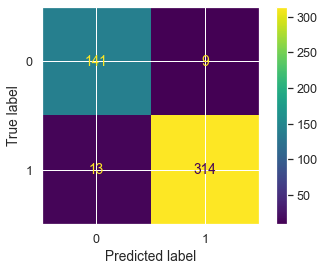

In [115]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
...                               display_labels=model.classes_)
disp.plot()
plt.show()

In [116]:
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('True Negatives',TN)
print('True Positives',TP)
print('False Positives',FP)
print('False Negatives',FN)

True Negatives 141
True Positives 314
False Positives 9
False Negatives 13


In [117]:
Accuracy(TN,TP,FP,FN)

0.9538784067085954

In [118]:
Precision=precision_score(y_test,y_pred)
Precision

0.9721362229102167

In [119]:
Recall=recall_score(y_test,y_pred)
Recall

0.9602446483180428

In [126]:
# Calculating F1 Score
def F1_score(Precision,Recall):
    ans=2*(Precision*Recall)/(Precision+Recall)
    return ans

In [127]:
F1_score=F1_score(Precision,Recall)
F1_score

0.9721362229102167

In [128]:
probs=model.predict_proba(X_test)[:,1]

roc_auc_score: 0.9613761467889909


Text(0, 0.5, 'True Positive Rate')

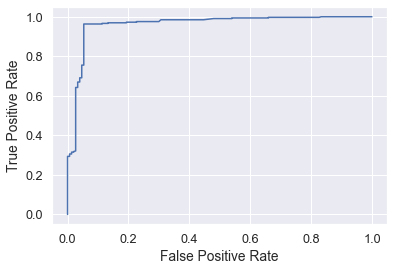

In [129]:
# ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thres=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
print('roc_auc_score:',roc_auc_score(y_test,probs))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Observations:

* Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. 
* Max score can be 1 but we got 0.96.
* Our Model is doing Great according to this Area under curve

f1 score 0.9661538461538461


Text(0, 0.5, 'Precision')

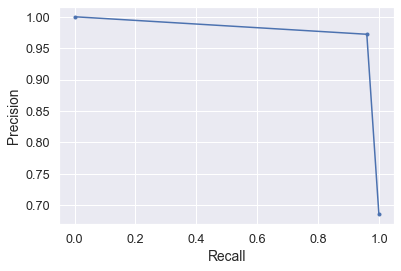

In [130]:
# Precision-Recall Curve
from sklearn.metrics import auc,precision_recall_curve,f1_score
lr_precision, lr_recall, _ = precision_recall_curve(y_test,y_pred)
lr_f1 = f1_score(y_test, y_pred)
auc(lr_recall,lr_precision)
print("f1 score",lr_f1)
plt.plot(lr_recall,lr_precision,marker='.')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Observations:

* F1 score is 0.966 which is very high
* According to this curve we get that There are high Precision and High Recall.
* This implies there are less false positives and false negatives.

# Actionable insights:

* No Duplicate Records Found
* some missing and outliers are present later imputed them.
* No change in monthly income so not including that  column for further analysis.
* Major Drivers are male according to Dataset.
* Total of 368 drivers rating has been increased.
* Total of 973 drivers rating has been Decreased.
* Major of Drivers are Graduated according to Dataset.
* More drivers are from city c20.
* The average age for Drivers are 30-35.
* Rating Decreased is positively correlated with churn data irrespective of Gender.
* If age of driver is high there is high chance of that driver churns according lineplot.
* No impact of Grade and Income of driver churns.
* Gender is slighlty impacting the churn data.
* Rating Increase is negatively correlated with churn irrespective of Gender.
* F1-score for Bagging(Random Forest) is 96.77
* F1-score for Boosting(XGBoost) is 96.61


# Recommendations:

* Drivers with Quarterly Rating Increased likely not to churn so provide some incentives or bonus to such Drivers.
* Drivers with Quarterly Rating Reduced likely to churn more, so try to connect with customers regarding the issues faced and     try to clear that issues.
* Provide some paid leaves for Drivers to reduce churning of Drivers.
* Take Surveys in detailed manner to know the issues faced by Drivers.
* Payment might be the major reason try to monitor the payments paid to Driver.